In [2]:
import pandas as pd
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import torch 

import pickle
from kg import KnowledgeGraph


In [3]:
data_dir = os.environ.get('DATA_DIR', './Data')
output_dir = os.environ.get('OUTPUT_DIR', './Output')

In [4]:
## Add node indices
## nodes_df: Dataframe containing node information with columns: node_idx, node_id, node_type
## relations_df: Dataframe containing relation information with columns: source ID/type, target ID/type

# def add_node_indices(nodes_df, relations_df):
#     """
#     Add node indices from nodes dataframe to relations dataframe based on ID and type matching.
    
#     Args:
# #     	nodes_df (pd.DataFrame): Dataframe containing node information with columns: node_idx, node_id, node_type
# #     	relations_df (pd.DataFrame): Dataframe containing relation information with columns: x_id, x_type, y_id, y_type
   
# #     Returns:
# #     	pd.DataFrame: Filtered relations dataframe with added x_idx, y_idx, and included columns
# #     """
#     # Create a copy of the relations dataframe to avoid modifying the original
#     result_df = relations_df.copy()
    
#     # Convert node_id to string type in nodes_df for consistent matching
#     nodes_df = nodes_df.copy()
#     nodes_df['node_id'] = nodes_df['node_id'].astype(str)
    
#     # Convert x_id and y_id to string type in relations_df
#     result_df['x_id'] = result_df['x_id'].astype(str)
#     result_df['y_id'] = result_df['y_id'].astype(str)
    
#     # Create a mapping dictionary from (node_id, node_type) to node_idx
#     node_mapping = pd.Series(
#         nodes_df.node_idx.values,
#         index=pd.MultiIndex.from_arrays([nodes_df.node_id, nodes_df.node_type])
#     ).to_dict()
    
#     # Create a function to safely get mapping value
#     def get_mapping(row, id_col, type_col):
#         key = (row[id_col], row[type_col])
#         return node_mapping.get(key)
    
#     # Add x_idx column by mapping (x_id, x_type)
#     result_df['x_idx'] = result_df.apply(
#         lambda row: get_mapping(row, 'x_id', 'x_type'), 
#         axis=1
#     )
    
#     # Add y_idx column by mapping (y_id, y_type)
#     result_df['y_idx'] = result_df.apply(
#         lambda row: get_mapping(row, 'y_id', 'y_type'), 
#         axis=1
#     )
    
#     # Check if both indices are valid (not NaN) and add 'included' column
#     result_df['included'] = result_df['x_idx'].notna() & result_df['y_idx'].notna()
    
#     # Filter rows where both x_idx and y_idx are not NaN
#     result_df = result_df[result_df['included']].copy()
    
#     # Convert x_idx and y_idx to integers
#     result_df['x_idx'] = result_df['x_idx'].astype(int)
#     result_df['y_idx'] = result_df['y_idx'].astype(int)
    
#     return result_df


# data_dir = os.environ.get('DATA_DIR', './Data')
# output_dir = os.environ.get('OUTPUT_DIR', './Output')

# df = pd.read_csv(f'{data_dir}/knowledge_graph/8.9.21_kg/kg_giant_orphanet.csv')
# print("Loading HPO to index dictionary...")

# with open(f'{data_dir}/knowledge_graph/8.9.21_kg/hpo_to_idx_dict_8.9.21_kg.pkl', 'rb') as f:
#     hpo_to_idx_dict = pickle.load(f)

# print("Loading Genes to index dictionary...")
# with open(f'{data_dir}/knowledge_graph/8.9.21_kg/ensembl_to_idx_dict_8.9.21_kg.pkl', 'rb') as file:
#     genes = pickle.load(file)

# with open(f'{data_dir}/preprocess/orphanet/orphanet_to_mondo_dict.pkl', 'rb') as file:
#         orphanet_to_mondo_dict = pickle.load(file)

# with open(f'{data_dir}/knowledge_graph/8.9.21_kg/mondo_to_idx_dict_8.9.21_kg.pkl', 'rb') as file:
#     mondo_to_idx_dict = pickle.load(file)

# # create_nodes_pkl(data_dir)
# with open(f'{data_dir}/knowledge_graph/8.9.21_kg/nodes_8.9.21_kg.pkl', 'rb') as file:
#     nodes = pickle.load(file)

In [5]:
# # The nodes_8.9.21_kg.pkl file contains node information with columns: node_idx, node_id, node_type
# with open(f'{data_dir}/knowledge_graph/8.9.21_kg/nodes_8.9.21_kg.pkl', 'rb') as file:
#     nodes = pickle.load(file)

# print("\nFirst 5 rows of the data:")
# print(nodes.head(5),"\n")
# print("there are:",nodes.shape[0],"of nodes \n")
# print(nodes['node_type'].value_counts())

In [6]:
# # the kg_giant_orphanet.csv file contains the relationships between nodes with columns
# # this is the predefined relationships between nodes
# df = pd.read_csv(f'{data_dir}/knowledge_graph/8.9.21_kg/kg_giant_orphanet.csv')

# print("\nFirst 5 rows of relationships:")
# print(df.head(5), "\n")
# print("there are:",df.shape[0],"of relationships \n")
# print(df['relation'].value_counts())


In [7]:
# # View some HPO indices
# print("Sample HPO indices:")
# print(list(hpo_to_idx_dict.items())[:5])

# # View some gene indices
# print("\nSample gene indices:")
# print(list(genes.items())[:5])

# # View some disease indices
# print("\nSample disease indices:")
# print(list(mondo_to_idx_dict.items())[:5])

In [8]:
# ## enriched information about the nodes and their relationships
# ## output: result.csv, after mapping the relationship into nodes, we built the knowledge graph
# result = add_node_indices(nodes, df)
# result.to_csv(f'{output_dir}/result.csv', index=False)


In [9]:
# ## Generate and construct the knowledge graph

# ## Initialize KG
# kg = KnowledgeGraph()

# ## Chucksize is the size of knowledge graph data to be loaded at once
# kg.create_from_csv(
#     filepath=f'./{output_dir}/result.csv',
#     nodes_filepath = f'{data_dir}/knowledge_graph/8.9.21_kg/nodes_8.9.21_kg.pkl',
#     chunksize=105220,  # Adjust based on your memory constraints
#     show_progress=True
# )
# # Save the graph
# ## This is the knowledge graph
# kg.save_graph(f'{output_dir}/my_graph_ids.graphml')


# # # code to double check the KG 
# # subgraph = kg.plot_random_subgraph(num_nodes=10000, method='random_walk')

In [10]:
# # # # Initialize KG
# kg = KnowledgeGraph()
# kg.load_graph(f'{output_dir}/my_graph_ids.graphml') #!!!!!!! if u want proper plotting u need to save and then load the graph, not work directly after creation the kg 

In [11]:
# # WORKING with PATINIET DATA
# print('Loading and processing patient data...')
# file_path = f'{data_dir}/patients/simulated_patients/disease_split_val_sim_patients_8.9.21_kg.txt'  # val data!!!!
# with open(file_path, 'r') as f:
#     val_data = [json.loads(line) for line in f]

# file_path = f'{data_dir}/patients/simulated_patients/disease_split_train_sim_patients_8.9.21_kg.txt'  # train data!!!!
# with open(file_path, 'r') as f:
#     train_data = [json.loads(line) for line in f]


# ## Map the phenotype to the index
# val_patients_phenotypes_list = [[hpo_to_idx_dict[phenotype] for phenotype in p['positive_phenotypes']] for p in val_data]
# train_patients_phenotypes_list = [[hpo_to_idx_dict[phenotype] for phenotype in p['positive_phenotypes']] for p in train_data]


# # Save the list to a pickle file
# with open(f'{output_dir}/val_patients_phenotypes_list.pkl', 'wb') as f:
#     pickle.dump(val_patients_phenotypes_list, f)

# ## Map genes to index
# val_patients_genes = [
#     [genes[g] for g in p['true_genes']]
#     for p in val_data
# ]


# # WORKING with PATINIET DATA
# print('Loading and processing patient data...')
# file_path = f'{data_dir}/patients/simulated_patients/disease_split_val_sim_patients_8.9.21_kg.txt'  # val data!!!!
# with open(file_path, 'r') as f:
#     val_data = [json.loads(line) for line in f]

# file_path = f'{data_dir}/patients/simulated_patients/disease_split_train_sim_patients_8.9.21_kg.txt'  # train data!!!!
# with open(file_path, 'r') as f:
#     train_data = [json.loads(line) for line in f]


# ## Map the phenotype to the index
# val_patients_phenotypes_list = [[hpo_to_idx_dict[phenotype] for phenotype in p['positive_phenotypes']] for p in val_data]
# train_patients_phenotypes_list = [[hpo_to_idx_dict[phenotype] for phenotype in p['positive_phenotypes']] for p in train_data]


# # Save the list to a pickle file
# with open(f'{output_dir}/val_patients_phenotypes_list.pkl', 'wb') as f:
#     pickle.dump(val_patients_phenotypes_list, f)

# ## Map genes to index
# val_patients_genes = [[genes[g] for g in p['true_genes']] for p in val_data]
# train_patients_genes = [[genes[g] for g in p['true_genes']] for p in train_data]

# # Save the list to a pickle file
# with open(f'{output_dir}/train_patients_phenotypes_list.pkl', 'wb') as f:
#     pickle.dump(train_patients_phenotypes_list, f)


# # Save the list to a pickle file
# with open(f'{output_dir}/val_patients_genes.pkl', 'wb') as f:
#     pickle.dump(val_patients_genes, f)

# # Save the list to a pickle file
# with open(f'{output_dir}/train_patients_genes.pkl', 'wb') as f:
#     pickle.dump(train_patients_genes, f)

# ## Map the disease to the index
# val_all_candidate_genes = [[genes[g] for g in p['all_candidate_genes'] if g in genes] for p in val_data]
# train_all_candidate_genes = [[genes[g] for g in p['all_candidate_genes'] if g in genes] for p in train_data]

# # Save the list to a pickle file
# with open(f'{output_dir}/val_all_candidate_genes.pkl', 'wb') as f:
#     pickle.dump(val_all_candidate_genes, f)

# # Save the list to a pickle file
# with open(f'{output_dir}/train_all_candidate_genes.pkl', 'wb') as f:
#     pickle.dump(train_all_candidate_genes, f)

# print("Saved patient_training and validation data")

# ## process test data
# file_path = f'{data_dir}/patients/mygene2_patients/mygene2_5.7.22.txt'  # val data!!!!

# with open(file_path, 'r') as f:
#     test_data = [json.loads(line) for line in f]
    
# test_patients_phenotypes_list = [[hpo_to_idx_dict[phenotype] for phenotype in p['positive_phenotypes']] for p in test_data]


# # Save the list to a pickle file
# with open(f'{output_dir}/test_patients_phenotypes_list.pkl', 'wb') as f:
#     pickle.dump(test_patients_phenotypes_list, f)

# test_patients_genes = [[genes[g] for g in p['true_genes']] for p in test_data]

# # Save the list to a pickle file
# with open(f'{output_dir}/test_patients_genes.pkl', 'wb') as f:
#     pickle.dump(test_patients_genes, f)


# test_all_candidate_genes = [[genes[g] for g in p['all_candidate_genes'] if g in genes] for p in test_data]

# # Save the list to a pickle file
# with open(f'{output_dir}/test_all_candidate_genes.pkl', 'wb') as f:
#     pickle.dump(test_all_candidate_genes, f)

# print("Saved patient_test data")

In [12]:
# What in training data 
# True genes that cause specific diseases
# True symptoms
# True age of conset
# All candidate genes

# train_data[0]

In [13]:
# ## Plot out the test data
# ## The grpah shows the connection between the patient's phenotypes, the candidate genes and the true genes of test data

# i=1

# kg.visualize_subgraph([str(n) for n in test_patients_phenotypes_list[i] + test_all_candidate_genes[i] + test_patients_genes[i]], 
#                                 true_gene_ids=[str(k) for k in test_patients_genes[i]])

In [14]:
# ## To map the local id to global id
# train_nx_subgraph = []
# train_pg_subgraph = []

# for i in range(len(train_patients_phenotypes_list)):
#     subgraph = kg.create_subgraph([str(n) for n in train_patients_phenotypes_list[i] + train_all_candidate_genes[i] + train_patients_genes[i]], 
#                                 true_gene_ids=[str(k) for k in train_patients_genes[i]])
#     pg_graph = kg.create_pyg_data_from_subgraph(subgraph)
#     train_nx_subgraph.append(subgraph)
#     train_pg_subgraph.append(pg_graph)

In [15]:
# print(train_pg_subgraph[0])
# ## x = 58 nodes, there are 7 types of nodes
# ## edge_index: 196 connections between nodes
# ## edge_attr: 15 types of the connections
# ## There are 36224 patients in the training data

In [16]:
# val_nx_subgraph = []
# val_pg_subgraph = []

# for i in range(len(val_patients_phenotypes_list)):

#     # Without patients
#     subgraph = kg.create_subgraph([str(n) for n in val_patients_phenotypes_list[i]+ val_all_candidate_genes[i]+ val_patients_genes[i]], true_gene_ids = [str(k) for k in val_patients_genes[i]])
#     pg_graph = kg.create_pyg_data_from_subgraph(subgraph)
#     val_nx_subgraph.append(subgraph)
#     val_pg_subgraph.append(pg_graph)

In [17]:
# val_pg_subgraph[0]

In [18]:
# test_nx_subgraph = []
# test_pg_subgraph = []

# for i in range(len(test_patients_phenotypes_list)):
#     subgraph = kg.create_subgraph([str(n) for n in test_patients_phenotypes_list[i] + test_all_candidate_genes[i] + test_patients_genes[i]], 
#                                 true_gene_ids=[str(k) for k in test_patients_genes[i]])
#     pg_graph = kg.create_pyg_data_from_subgraph(subgraph)
#     test_nx_subgraph.append(subgraph)
#     test_pg_subgraph.append(pg_graph)

In [19]:
# def save_data(graphs, save_dir):
#     os.makedirs(save_dir, exist_ok=True)
    
#     for i, graph in enumerate(graphs):
#         torch.save(graph, f'{save_dir}/graph_{i}.pt')

# save_dir = "/kai/Kai_Backup/Study/GiG in rare diease detection/Data/saved_graphs_2/test"
# save_data(test_pg_subgraph, save_dir)


In [20]:
# def load_data(save_dir):
#     graphs = []
#     for file in os.listdir(save_dir):
#         if file.endswith(".pt"):
#             graphs.append(torch.load(f'{save_dir}/{file}'))
#     return graphs

# save_dir = "./Data/saved_graphs/train"
# train_pg_subgraph = load_data(save_dir)

# save_dir = "./Data/saved_graphs/val"
# val_pg_subgraph = load_data(save_dir)

# save_dir = "./Data/saved_graphs/test"
# test_pg_subgraph = load_data(save_dir)

In [21]:
def load_data(save_dir):
    graphs = []
    for file in os.listdir(save_dir):
        if file.endswith(".pt"):
            graphs.append(torch.load(f'{save_dir}/{file}'))
    return graphs

save_dir = "./Data/saved_graphs_2/train"
train_pg_subgraph = load_data(save_dir)

save_dir = "./Data/saved_graphs_2/val"
val_pg_subgraph = load_data(save_dir)

save_dir = "./Data/saved_graphs_2/test"
test_pg_subgraph = load_data(save_dir)

/tmp/ipykernel_58839/1779739518.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  graphs.append(torch.load(f'{save_dir}/{file}'))


In [22]:
## To get the number of true gene and set true gene as data.y label
all_true_gene_ids = []

for patient in train_pg_subgraph:
    all_true_gene_ids.extend(patient.true_gene_ids)

for patient in val_pg_subgraph:
    all_true_gene_ids.extend(patient.true_gene_ids)
    
for patient in test_pg_subgraph:
    all_true_gene_ids.extend(patient.true_gene_ids)

## Get the unique true gene ids
unique_true_gene_ids = set(all_true_gene_ids)
print("the number of unique true gene ids is:",len(unique_true_gene_ids))

## Mapping all unique true gene ids to a index from 0 to the number of unique true gene ids
gene_id_mapping = {gene_id: idx for idx, gene_id in enumerate(unique_true_gene_ids)}
print(gene_id_mapping)

## Add the true gene ids back to the graph
for patient in train_pg_subgraph:
    patient.y = torch.tensor([gene_id_mapping[gene_id] for gene_id in patient.true_gene_ids], dtype=torch.long)

for patient in val_pg_subgraph:
    patient.y = torch.tensor([gene_id_mapping[gene_id] for gene_id in patient.true_gene_ids], dtype=torch.long)

for patient in test_pg_subgraph:
    patient.y = torch.tensor([gene_id_mapping[gene_id] for gene_id in patient.true_gene_ids], dtype=torch.long)

print(train_pg_subgraph[0].true_gene_ids)
print(train_pg_subgraph[0].y)

print(val_pg_subgraph[0].true_gene_ids)
print(val_pg_subgraph[0].y)

print(test_pg_subgraph[0].true_gene_ids)
print(test_pg_subgraph[0].y)

the number of unique true gene ids is: 2405
{4: 0, 10: 1, 8204: 2, 8208: 3, 18: 4, 8210: 5, 22: 6, 23: 7, 29: 8, 30: 9, 8224: 10, 33: 11, 37: 12, 8231: 13, 41: 14, 8234: 15, 43: 16, 42: 17, 8246: 18, 61: 19, 67: 20, 8266: 21, 74: 22, 8268: 23, 78: 24, 80: 25, 83: 26, 85: 27, 87: 28, 88: 29, 8281: 30, 8283: 31, 8284: 32, 92: 33, 95: 34, 97: 35, 98: 36, 100: 37, 111: 38, 8305: 39, 8318: 40, 130: 41, 133: 42, 143: 43, 144: 44, 146: 45, 150: 46, 8345: 47, 154: 48, 57506: 49, 163: 50, 162: 51, 57507: 52, 169: 53, 8362: 54, 173: 55, 177: 56, 178: 57, 8371: 58, 8372: 59, 57521: 60, 8376: 61, 8378: 62, 8379: 63, 187: 64, 8388: 65, 8395: 66, 207: 67, 209: 68, 212: 69, 8405: 70, 213: 71, 8411: 72, 8416: 73, 8422: 74, 232: 75, 8428: 76, 238: 77, 242: 78, 8434: 79, 8437: 80, 246: 81, 8439: 82, 245: 83, 249: 84, 57595: 85, 8446: 86, 256: 87, 8454: 88, 8456: 89, 8458: 90, 8462: 91, 8464: 92, 57618: 93, 8466: 94, 276: 95, 279: 96, 8473: 97, 8477: 98, 8480: 99, 288: 100, 57632: 101, 291: 102, 8484: 10

In [23]:
## Preprocess the trainign data, extract only x, y, edge_index

from torch_geometric.data import Data

def preprocess_graph_data(dataset):
    processed_graphs = []
   
    for data in dataset:
        
        new_data = Data(
            edge_index=data.edge_index,
            y=data.y,
            x=data.x,
            original_ids = data.original_ids,
            edge_attr=data.edge_attr
        )
        processed_graphs.append(new_data)
    
    return processed_graphs

train_data = preprocess_graph_data(train_pg_subgraph)
val_data = preprocess_graph_data(val_pg_subgraph)
test_data = preprocess_graph_data(test_pg_subgraph)

In [24]:
## Define collate function for handling batched data
def optimized_collate_fn(batch):

    batch_size = len(batch)
    cumsum_nodes = 0
    
    # Adjust edge indices to account for the node offset in each batch
    adjusted_edge_indices = []
    for data in batch:
        edge_index = data.edge_index + cumsum_nodes
        adjusted_edge_indices.append(edge_index)
        cumsum_nodes += data.num_nodes

    # Concatenate with adjusted indices
    x = torch.cat([data.x for data in batch], dim=0)
    y = torch.cat([data.y for data in batch], dim=0)
    edge_index = torch.cat(adjusted_edge_indices, dim=1)
    edge_attr = torch.cat([data.edge_attr for data in batch], dim=0) if batch[0].edge_attr is not None else None
    batch_tensor = torch.cat([torch.full((data.num_nodes,), i, dtype=torch.long) for i, data in enumerate(batch)])
    
    ## Additional attributes
    original_ids = torch.cat([torch.tensor(data.original_ids, dtype=torch.long) if isinstance(data.original_ids, list) else data.original_ids for data in batch if data.original_ids is not None])
    
    return Data(
        x = x,
        y = y,
        edge_index=edge_index,
        edge_attr=edge_attr,
        batch=batch_tensor,
        original_ids=original_ids,
        batch_size=batch_size,
      
    )
## torch.dataloader doesn't consider custom data types
from torch.utils.data import DataLoader

train_loader = DataLoader(train_data, batch_size=128, shuffle=True, collate_fn=optimized_collate_fn)
val_loader = DataLoader(val_data, batch_size=128, collate_fn=optimized_collate_fn)
test_loader = DataLoader(test_data, batch_size=128, collate_fn=optimized_collate_fn)


In [25]:
import torch.nn as nn

class GlobalNodeEmbedding(nn.Module):
    def __init__(self, num_global_nodes, embedding_dim):
        super().__init__()
        self.embedding = nn.Embedding(num_global_nodes, embedding_dim)
   
    def forward(self, node_ids):
        if isinstance(node_ids, list):
            node_ids = torch.tensor(node_ids, dtype=torch.long)
        node_ids = node_ids.view(-1)  # Flatten any multi-dimensional input

        embeddings = self.embedding(node_ids)
        return embeddings


In [26]:
## Approximate node degree distribution
## Binning node degrees into a soft Histogram
## This is used for graph regularization
import torch
import torch.nn as nn

# Custom SoftHistogram for Graph Regularization
class SoftHistogram(nn.Module):
    def __init__(self, bins, min, max, sigma):
        super().__init__()
        self.bins = bins
        self.min = min
        self.max = max
        self.sigma = sigma
        self.delta = (max - min) / bins
        self.centers = torch.linspace(min + self.delta / 2, max - self.delta / 2, bins)
        
    def forward(self, x):
                    
        x = x.unsqueeze(1) 
        centers = self.centers.to(x.device)
        centers = centers.view(1, -1)
        
        ## Calculate the distance between the x and the centers
        dist = torch.clamp(torch.abs(x - centers), min=0.0, max=10.0)
        
        ## Calculate the weights
        weights = torch.exp(-dist ** 2 / (2 * self.sigma ** 2))
        
        ## Normalize the weights
        sum_weights = weights.sum(dim=1, keepdim=True)
        ## Avoid division by zero
        sum_weights = torch.clamp(sum_weights, min=1e-10)
        ## Normalize the weights
        weights = weights / sum_weights
        
        histogram = weights.sum(dim=0)
        
        return histogram

In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import (
    GCNConv, GraphConv, SAGEConv, GIN, 
    global_mean_pool, global_add_pool
)
import numpy as np

## Node-Level Module (F1)
class F1NodeLevelModule(nn.Module):
    def __init__(self, input_dim, hidden_dim, embedding_dim, conv_type='GCN',
                 dropout=0.5, pooling="mean", num_layers=2):
        super().__init__()

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.embedding_dim = embedding_dim
        self.dropout = dropout

        # Choose GNN Layer Type
        if conv_type == "GCN":
            Conv = GCNConv
        elif conv_type == "Graph":
            Conv = GraphConv
        elif conv_type == "SAGE":
            Conv = SAGEConv
        elif conv_type == "GIN":
            Conv = lambda in_dim, out_dim: GIN(
                nn=nn.Sequential(
                    nn.Linear(in_dim, out_dim),
                    nn.ReLU(),
                    nn.Linear(out_dim, out_dim)
                )
            )
        else:
            raise ValueError(f"Unknown conv_type: {conv_type}")

        # Define GNN layers
        self.convs = nn.ModuleList()
        self.bns = nn.ModuleList()

        # First Layer
        self.convs.append(Conv(input_dim, hidden_dim))
        self.bns.append(nn.LayerNorm(hidden_dim))  # Using LayerNorm for stability

        # Hidden Layers (Adding Residual Connections)
        for _ in range(num_layers):
            self.convs.append(Conv(hidden_dim, hidden_dim))
            self.bns.append(nn.LayerNorm(hidden_dim))

        # Last Layer
        self.convs.append(Conv(hidden_dim, embedding_dim))
        self.bns.append(nn.LayerNorm(embedding_dim))  # Ensure correct dimension

        self.dropout_layer = nn.Dropout(dropout)
        self.pooling = global_mean_pool if pooling == "mean" else global_add_pool


    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch

        for conv, bn in zip(self.convs[:-1], self.bns[:-1]):
            x = conv(x, edge_index)
            x = bn(x)
            x = F.relu(x)
            x = self.dropout_layer(x)

        x = self.convs[-1](x, edge_index)
        x = self.bns[-1](x)
        x = F.relu(x)
        x = self.dropout_layer(x)

        node_embeddings = x
        graph_embeddings = self.pooling(node_embeddings, batch)

        return node_embeddings, graph_embeddings


## Population-Level Module (F2)
class F2PopulationLevelGraph(nn.Module):
    def __init__(self, embedding_dim, latent_dim, temperature=0.5, threshold=0.1):
        super().__init__()

        self.embedding_dim = embedding_dim
        self.latent_dim = latent_dim

        # Latent Space Transformation
        self.latent_transform = nn.Sequential(
            nn.Linear(embedding_dim, latent_dim),
            nn.BatchNorm1d(latent_dim), 
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(latent_dim, latent_dim)
        )

        # Learnable Parameters - use log-space parameters for better stability
        self.log_temperature = nn.Parameter(torch.tensor(np.log(temperature), dtype=torch.float32))
        self.log_threshold = nn.Parameter(torch.tensor(np.log(threshold), dtype=torch.float32))
        self.mu = nn.Parameter(torch.tensor(2.0, dtype=torch.float32))
        self.sigma = nn.Parameter(torch.tensor(1.0, dtype=torch.float32))
        
    def forward(self, graph_embeddings):
        
        # Transform to latent space with gradient tracking
        latent_space = self.latent_transform(graph_embeddings)
        
        # Normalize but check for all-zero vectors
        norm = torch.norm(latent_space, p=2, dim=-1, keepdim=True)
        safe_norm = torch.clamp(norm, min=1e-8)
        latent_space = latent_space / safe_norm
        
        # Convert log-space parameters to actual values with bounds
        temperature = torch.exp(torch.clamp(self.log_temperature, min=-10, max=10))
        threshold = torch.exp(torch.clamp(self.log_threshold, min=-10, max=10))

        # Compute Pairwise Distances safely
        pairwise_distances = torch.cdist(latent_space, latent_space, p=2)
        
        # Compute Adjacency Matrix with safety bounds
        scaled_distances = -temperature * pairwise_distances
        adjacency_matrix = torch.sigmoid(scaled_distances + threshold)
        
        # Find edges with sufficient confidence
        edge_mask = adjacency_matrix > 0.1
            
        # Extract valid edges
        edge_indices = torch.nonzero(edge_mask, as_tuple=False)
        edge_index = edge_indices.t()
        edge_weight = adjacency_matrix[edge_indices[:, 0], edge_indices[:, 1]]
        
        # Safe KL Loss computation
        try:
            # Limit the number of bins to make computation more stable
            n_nodes = adjacency_matrix.shape[0]
            n_bins = min(n_nodes, 20)  # Cap bins to avoid sparse histograms
            
            softhist = SoftHistogram(bins=n_bins, min=0.5, max=n_bins + 0.5, sigma=0.6)
            
            # Compute weighted degrees (sum of connection weights)
            degrees = torch.sum(adjacency_matrix, dim=1)
            
            # Prevent extremely small or large degree values
            degrees = torch.clamp(degrees, min=0.1, max=float(n_nodes))
            
            # Compute degree distribution
            degree_dist = softhist(degrees)
            sum_dist = torch.sum(degree_dist)
            
            # Avoid division by zero
            if sum_dist > 1e-10:
                degree_dist = degree_dist / sum_dist
            else:
                degree_dist = torch.ones_like(degree_dist) / len(degree_dist)
            
            # Compute target distribution
            target_dist = self._compute_target_distribution(n_bins)
            
            # Compute KL divergence with numerical stability
            # Only compute KL for non-zero entries to avoid log(0)
            mask = (degree_dist > 1e-10) & (target_dist > 1e-10)
            
            if mask.any():
                kl_terms = degree_dist[mask] * (
                    torch.log(degree_dist[mask]) - torch.log(target_dist[mask])
                )
                kl_loss = torch.sum(kl_terms)
                
                # Prevent extreme KL values
                kl_loss = torch.clamp(kl_loss, min=0.0, max=10.0)
            else:
                kl_loss = torch.tensor(0.1, device=adjacency_matrix.device)
                
        except Exception as e:
            print(f"KL loss calculation error: {e}")
            kl_loss = torch.tensor(0.1, device=adjacency_matrix.device)
            
        return adjacency_matrix, edge_index, edge_weight, kl_loss

    def _compute_target_distribution(self, n_bins):
        """Compute target degree distribution (simplified Gaussian)"""
        device = self.mu.device
        
        # Clamp parameters to reasonable values
        mu = torch.clamp(self.mu, min=1.0, max=float(n_bins - 1))
        sigma = torch.clamp(self.sigma, min=0.5, max=float(n_bins / 2))
        
        # Generate bin centers
        indices = torch.arange(n_bins, device=device, dtype=torch.float32)
        
        # Gaussian distribution
        dist = torch.exp(-0.5 * ((indices - mu) / sigma) ** 2)
        
        # Ensure non-zero probabilities everywhere
        dist = dist + 1e-6
        
        # Normalize
        return dist / torch.sum(dist)

class F3Classifier(nn.Module):
    def __init__(self, input_dim_h, gnn_hidden_dim, num_classes, conv_type="GCN",
                 gnn_layers=2, dropout=0.5):
        super().__init__()

        # Choose GNN Layer Type
        if conv_type == "GCN":
            Conv = GCNConv
        elif conv_type == "Graph":
            Conv = GraphConv
        elif conv_type == "SAGE":
            Conv = SAGEConv
        elif conv_type == "GIN":
            Conv = lambda in_dim, out_dim: GIN(
                nn=nn.Sequential(
                    nn.Linear(in_dim, out_dim),
                    nn.ReLU(),
                    nn.Linear(out_dim, out_dim)
                )
            )
        else:
            raise ValueError(f"Unknown conv_type: {conv_type}")
      
        # GNN Layers
        self.gnn_layers = nn.ModuleList([
            Conv(input_dim_h if i == 0 else gnn_hidden_dim, gnn_hidden_dim) 
            for i in range(gnn_layers)
        ])
        
        # Use LayerNorm instead of BatchNorm for better training stability
        self.layer_norms = nn.ModuleList([nn.LayerNorm(gnn_hidden_dim) for _ in range(gnn_layers)])
        self.dropout = nn.Dropout(dropout)
        
        # The final classifier layer with proper initialization
        self.classifier = nn.Linear(gnn_hidden_dim, num_classes)
        nn.init.xavier_uniform_(self.classifier.weight)
        nn.init.constant_(self.classifier.bias, 0.0)

    def forward(self, h, edge_index, batch, Ap=None, edge_weight=None):
        # Process through GNN layers
        for i, (gnn, norm) in enumerate(zip(self.gnn_layers, self.layer_norms)):
            # Apply convolution
            if edge_weight is not None and isinstance(gnn, (GCNConv, GraphConv)):
                h_new = gnn(h, edge_index, edge_weight)
            else:
                h_new = gnn(h, edge_index)

            # Apply normalization and activation
            h_new = norm(h_new)
            h_new = F.relu(h_new)
            h_new = self.dropout(h_new)

            # Add residual connection if shapes match
            if h.shape[-1] == h_new.shape[-1]:
                h = h + h_new
            else:
                h = h_new  

        # Global Pooling
        graph_embeddings = global_mean_pool(h, batch)
        
        # Optional AP transform
        if Ap is not None:
            Ap = F.softmax(Ap, dim=1)
            graph_embeddings = torch.matmul(Ap, graph_embeddings)

        # Final classification
        logits = self.classifier(graph_embeddings)
        
        return logits

In [43]:
import torch
import torch.nn as nn

class GiG(nn.Module):
    def __init__(self, config):
        super().__init__()
        
        self.node_level_module = F1NodeLevelModule(
            input_dim=config["input_dim"],
            hidden_dim=config["hidden_dim"],
            embedding_dim=config["embedding_dim"],
            conv_type=config["conv_type"],
            dropout=config["dropout"]
        )
        
        self.population_level_module = F2PopulationLevelGraph(
            embedding_dim=config["embedding_dim"],
            latent_dim=config["latent_dim"]
        )
        
        self.classifier = F3Classifier(
            input_dim_h=config["embedding_dim"],
            gnn_hidden_dim=config["gnn_hidden_dim"],
            num_classes=config["num_classes"],
            conv_type=config["conv_type"],
            gnn_layers=config["gnn_layers"],
            dropout=config["dropout"]
        )
        
    def forward(self, data):
        try:
            # Process inputs through node-level module
            feature_matrix, graph_embeddings = self.node_level_module(data)
            
            # Check for NaN values and sanitize
            if not torch.isfinite(feature_matrix).all():
                print("WARNING: Non-finite values in feature matrix")
                feature_matrix = torch.nan_to_num(feature_matrix)
                
            if not torch.isfinite(graph_embeddings).all():
                print("WARNING: Non-finite values in graph embeddings")
                graph_embeddings = torch.nan_to_num(graph_embeddings)
            
            # Process through population-level module with error handling
            try:
                adjacency_matrix, edge_index, edge_weight, kl_loss = self.population_level_module(graph_embeddings)
            except Exception as e:
                print(f"ERROR in population module: {e}")
                # Create fallback values
                batch_size = graph_embeddings.size(0)
                device = graph_embeddings.device
                
                # Create identity matrix for adjacency
                adjacency_matrix = torch.eye(batch_size).to(device)
                
                # Create self-loops
                edge_index = torch.stack([
                    torch.arange(batch_size, device=device),
                    torch.arange(batch_size, device=device)
                ], dim=0)
                
                # Create edge weights
                edge_weight = torch.ones(batch_size, device=device)
                
                # Default KL loss
                kl_loss = torch.tensor(0.1, device=device)
            
            # Process through classifier with error handling
            try:
                # Make sure we properly handle the Ap argument
                if hasattr(data, 'Ap'):
                    Ap = data.Ap
                else:
                    Ap = None

                logits = self.classifier(
                    feature_matrix, edge_index, data.batch, 
                    Ap, edge_weight
                )
            except Exception as e:
                print(f"ERROR in classifier: {e}")
                
                # Create fallback logits
                batch_size = torch.unique(data.batch).size(0)
                num_classes = self.classifier.classifier.out_features
                logits = torch.zeros(batch_size, num_classes, device=feature_matrix.device)
            
            # Final check for NaN values
            if not torch.isfinite(logits).all():
                print("WARNING: Non-finite values in logits")
                logits = torch.nan_to_num(logits)
                
            if not torch.isfinite(kl_loss):
                print("WARNING: Non-finite values in KL loss")
                kl_loss = torch.tensor(0.1, device=logits.device)
                
            return logits, adjacency_matrix, kl_loss
            
        except Exception as e:
            print(f"CRITICAL ERROR in GiG forward pass: {e}")
            # Complete fallback for catastrophic failure
            batch_size = torch.unique(data.batch).size(0)
            num_classes = self.classifier.classifier.out_features
            device = next(self.parameters()).device
            
            logits = torch.zeros(batch_size, num_classes, device=device)
            adjacency_matrix = torch.eye(batch_size, device=device)
            kl_loss = torch.tensor(0.1, device=device)
            
            return logits, adjacency_matrix, kl_loss

In [44]:
import pytorch_lightning as pl
import torch
import torch.nn as nn
import torchmetrics
from torch.optim.lr_scheduler import ReduceLROnPlateau, CosineAnnealingLR

# Define Loss Dictionary
losses = nn.ModuleDict({
    'BCEWithLogitsLoss': nn.BCEWithLogitsLoss(),
    'CrossEntropyLoss': nn.CrossEntropyLoss(),
    'MultiTaskBCE': nn.BCEWithLogitsLoss(pos_weight=torch.Tensor([10]))
})

class GiGTrainer(pl.LightningModule):
    def __init__(self, config):
        super().__init__()
        self.config = config
        self.save_hyperparameters(config)
        self.automatic_optimization = False  # Manual optimization

        # Initialize the model
        self.model = GiG(config)

        # Global node embedding setup
        self.global_node_embedding = nn.Embedding(
            num_embeddings=105220, embedding_dim=config["input_dim"]
        )

        # Set loss function
        self.initial_loss = losses[config["loss"]]
        self.alpha = config["alpha"]

        # Store embeddings for debugging
        self.node_embeddings = None

    def forward(self, data):
        return self.model(data)

    def _shared_step(self, data, addition):
        """Common logic for train, validation, and test steps with NaN protection."""
        try:
            # Ensure input embeddings are used correctly
            data.x = self.global_node_embedding(data.original_ids.long().to(self.device))
            
            # Forward pass
            logits, adj_matrix, kl_loss = self.model(data)
            
            # Check for NaN values
            if torch.isnan(logits).any():
                print(f"Warning: NaN in logits detected in {addition} step")
                # Reset logits to small random values
                logits = torch.randn_like(logits) * 0.01
                
            if torch.isnan(kl_loss):
                print(f"Warning: NaN in KL loss detected in {addition} step")
                kl_loss = torch.tensor(0.1, device=self.device)
            
            # Prepare labels
            labels = data.y.view(-1).long().to(self.device)
            
            # Compute classification loss
            classification_loss = self.initial_loss(logits, labels)
            
            # Handle NaN classification loss
            if torch.isnan(classification_loss):
                print(f"Warning: NaN in classification loss detected in {addition} step")
                classification_loss = torch.tensor(5.0, device=self.device)  # Reasonable default
            
            # Apply very small KL loss weight initially
            epoch_fraction = self.current_epoch / max(1, self.trainer.max_epochs)
            kl_weight = self.alpha * min(0.01, epoch_fraction)  # Tiny weight that grows slowly
            
            # Total loss
            total_loss = classification_loss + kl_weight * kl_loss
            
            # Compute metrics safely
            try:
                acc = torchmetrics.functional.accuracy(
                    logits.argmax(dim=-1), labels, task="multiclass", num_classes=logits.shape[1]
                )
                f1 = torchmetrics.functional.f1_score(
                    logits.argmax(dim=-1), labels, task="multiclass", num_classes=logits.shape[1]
                )
            except Exception as e:
                print(f"Error computing metrics: {e}")
                acc = torch.tensor(0.0)
                f1 = torch.tensor(0.0)
                
        except Exception as e:
            print(f"Error in {addition} step: {e}")
            # Provide default values to continue training
            classification_loss = torch.tensor(7.0, device=self.device)
            kl_loss = torch.tensor(0.1, device=self.device)
            total_loss = classification_loss
            acc = torch.tensor(0.0)
            f1 = torch.tensor(0.0)
            kl_weight = torch.tensor(0.0)
        
        # Log metrics
        metrics = {
            f"{addition}_acc": acc,
            f"{addition}_f1": f1,
            f"{addition}_loss": total_loss,
            f"{addition}_classification_loss": classification_loss,
            f"{addition}_kl_loss": kl_loss,
            f"{addition}_kl_weight": kl_weight
        }
        
        return metrics, total_loss

    def training_step(self, batch, batch_idx):
        """Training step with gradient clipping and NaN detection."""
        # Get optimizers
        main_optimizer, lgl_optimizer = self.optimizers()
        
        # Zero gradients
        main_optimizer.zero_grad()
        lgl_optimizer.zero_grad()
        
        # Forward and loss calculation
        metrics, loss = self._shared_step(batch, "train")
        
        # Check if loss is valid
        if not torch.isfinite(loss):
            print(f"Warning: Non-finite loss detected: {loss}")
            # Return a default loss to continue training
            placeholder_loss = torch.tensor(5.0, device=self.device, requires_grad=True)
            self.log_dict(metrics, prog_bar=True, batch_size=len(batch.y))
            return placeholder_loss
        
        # Backward pass
        self.manual_backward(loss)
        
        # Check for NaN/Inf gradients before optimizer step
        valid_gradients = True
        for name, param in self.named_parameters():
            if param.grad is not None:
                if not torch.isfinite(param.grad).all():
                    print(f"Warning: Non-finite gradients in {name}")
                    valid_gradients = False
                    param.grad = torch.zeros_like(param.grad)  # Reset problematic gradients
        
        # Clip gradients to prevent explosion
        if valid_gradients:
            torch.nn.utils.clip_grad_norm_(self.parameters(), max_norm=1.0)
        
        # Update parameters
        main_optimizer.step()
        lgl_optimizer.step()
        
        # Log metrics
        self.log_dict(metrics, prog_bar=True, batch_size=len(batch.y))
        
        return loss

    def validation_step(self, batch, batch_idx):
        metrics, _ = self._shared_step(batch, "val")
        
        with torch.no_grad():  # Ensure we don't compute gradients
            node_embeddings, _ = self.model.node_level_module(batch)
            node_embeddings = node_embeddings.detach().cpu()
            
            # Store embeddings for later analysis
            if self.node_embeddings is None:
                self.node_embeddings = node_embeddings
            else:
                self.node_embeddings = torch.cat([self.node_embeddings, node_embeddings], dim=0)
        
        self.log_dict(metrics, prog_bar=True, batch_size=len(batch.y))
        return metrics

    def test_step(self, batch, batch_idx):
        metrics, _ = self._shared_step(batch, "test")
        self.log_dict(metrics, batch_size=len(batch.y))
        return metrics

    def configure_optimizers(self):
        """Set up optimizers and learning rate schedulers."""
        # Main parameters excluding population graph learnable scalars
        main_params = [
            param for name_, param in self.model.population_level_module.named_parameters()
            if name_ not in ["log_temperature", "log_threshold", "mu", "sigma"]
        ]
        main_params.extend(self.model.node_level_module.parameters())
        main_params.extend(self.model.classifier.parameters())

        # Define optimizers with weight decay
        main_optimizer = torch.optim.Adam(
            main_params, 
            lr=self.config["lr"],
            weight_decay=self.config.get("weight_decay", 1e-5)
        )
        
        # Updated parameter names for log-space parameters
        lgl_optimizer = torch.optim.Adam([
            self.model.population_level_module.log_temperature,
            self.model.population_level_module.log_threshold,
            self.model.population_level_module.mu,
            self.model.population_level_module.sigma
        ], lr=self.config["lr_theta_temp"])

        # Define learning rate scheduler
        if self.config["scheduler"] == "ReduceLROnPlateau":
            scheduler_dict = {
                "scheduler": ReduceLROnPlateau(
                    main_optimizer, mode="min", patience=5,
                    threshold=0.001, verbose=True
                ),
                "interval": "epoch",
                "monitor": "val_loss",
                "frequency": 1
            }
        else:
            scheduler_dict = {
                "scheduler": CosineAnnealingLR(main_optimizer, T_max=10),
                "interval": "epoch",
                "monitor": "val_loss",
                "frequency": 1
            }

        return [main_optimizer, lgl_optimizer], [scheduler_dict]

In [45]:
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import (
    ModelCheckpoint,
    EarlyStopping,
    LearningRateMonitor
)
import wandb
from pytorch_lightning.loggers import WandbLogger


# Setup callbacks
callbacks = [
    ModelCheckpoint(
        monitor='val_loss',
        dirpath='checkpoints',
        filename='gig-{epoch:02d}-{val_loss:.2f}',
        save_top_k=3,
        mode='min',
    ),
    EarlyStopping(
        monitor='val_loss',
        min_delta=0.1,
        patience=1,
        mode='min',
        verbose=True
    ),
    LearningRateMonitor(logging_interval='epoch')
]

# Setup logger
wandb_logger = WandbLogger(project="gig-model")

config = {
    "input_dim": 7,
    "hidden_dim": 32,     
    "embedding_dim": 32,   
    "latent_dim": 8,      
    "gnn_hidden_dim": 32,  
    "num_classes": len(unique_true_gene_ids),
    "gene_embedding_dim": 16,
    
    "conv_type": "GCN",
    "gnn_layers": 2,
    "dropout": 0.5,        
    "lr": 1e-3,            
    "optimizer_lr": 0.001,
    "lr_theta_temp": 0.001,  
    "alpha": 0.001,     
   
    "loss": "CrossEntropyLoss",
    "scheduler": "ReduceLROnPlateau",
    "weight_decay": 1e-3   # Added weight decay
}


model = GiGTrainer(config)

trainer = Trainer(
    max_epochs=50,
    accelerator='gpu',
    devices='auto',
    callbacks=callbacks,
    logger=wandb_logger,
    deterministic=False,
    benchmark=True
)

trainer.fit(model, train_loader, val_loader)
trainer.test(model, test_loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/kai/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loggers/wandb.py:397: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
/home/kai/anaconda3/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /kai/Kai_Backup/Study/GiG in rare diease detection/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/kai/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
/home/kai/anaconda3/lib/python3.11/site-packages/pytorch_lightning/core/optimizer.py:317: The lr scheduler dict contains the key(s) ['monitor'], but th

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/kai/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/home/kai/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 8.665


Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 1 records. Best score: 8.665. Signaling Trainer to stop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/kai/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │            0.0            │
│ test_classification_loss  │     7.84512186050415      │
│          test_f1          │            0.0            │
│       test_kl_loss        │     6.05049467086792      │
│      test_kl_weight       │   9.999999747378752e-06   │
│         test_loss         │      7.8451828956604      │
└───────────────────────────┴───────────────────────────┘

[{'test_acc': 0.0,
  'test_f1': 0.0,
  'test_loss': 7.8451828956604,
  'test_classification_loss': 7.84512186050415,
  'test_kl_loss': 6.05049467086792,
  'test_kl_weight': 9.999999747378752e-06}]

Training complete, visualizing single patient connections...
F2 adjacency matrix shape: (128, 128)
Adjacency matrix min value: 0.2909
Adjacency matrix max value: 0.5246
Adjacency matrix mean value: 0.3815

Adjacency matrix (5x5 sample):
[[0.5246 0.4157 0.3142 0.3296 0.4495]
 [0.4157 0.5246 0.3003 0.3142 0.4504]
 [0.3142 0.3003 0.5246 0.4828 0.3227]
 [0.3296 0.3142 0.4828 0.5245 0.3457]
 [0.4495 0.4504 0.3227 0.3457 0.5246]]

Connections above threshold (0.3): 15744
Connection density: 0.9609 (96.09%)
Full adjacency matrix saved to f2_visualizations/f2_adjacency_matrix.csv
Adjacency matrix summary saved to f2_visualizations/f2_adjacency_summary.csv

Patient 1 Connection Analysis:
Total connection degree: 49.6370
Connected to 117 other patients with strength > 0.3


/tmp/ipykernel_58839/1101774467.py:182: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos,


Patient connection visualization saved to f2_visualizations/patient_1_connections.png
Patient connection data saved to f2_visualizations/patient_1_connections.csv


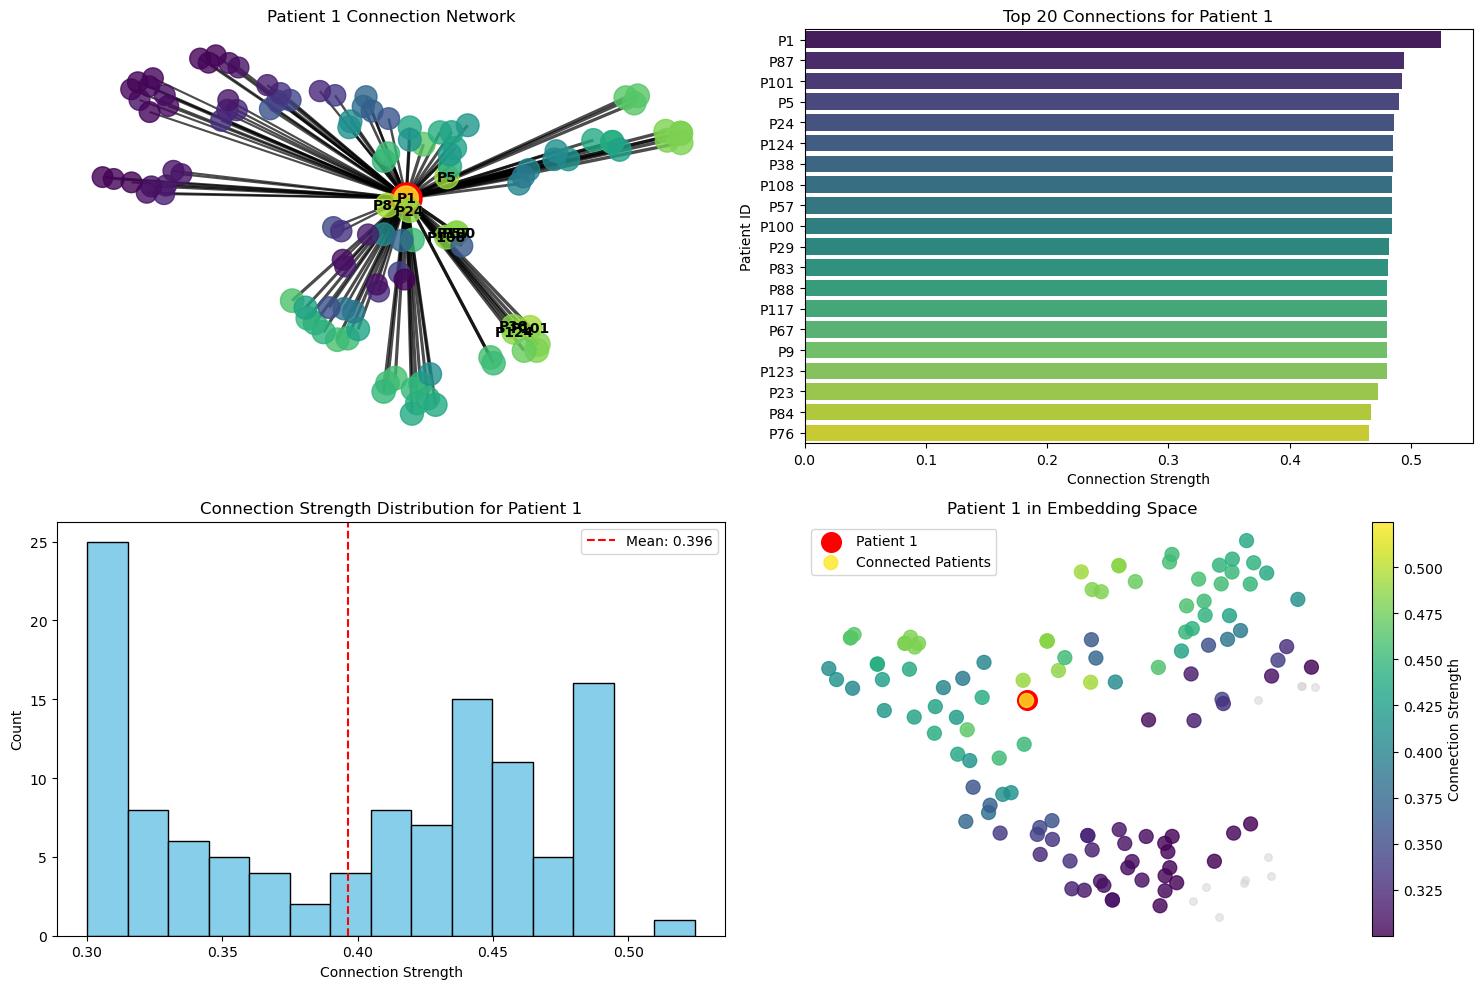

In [56]:
# Add this code after training to visualize a single patient's connections

print("Training complete, visualizing single patient connections...")

# Create output directory for visualizations
import os
output_dir = "patient_visualizations"
os.makedirs(output_dir, exist_ok=True)

# Make sure model is in evaluation mode
model.eval()
device = next(model.parameters()).device

# Get a batch of data from the test loader
batch = next(iter(test_loader))
batch = batch.to(device)

# Print out the adjacency matrix dimensions
print(f"F2 adjacency matrix shape: {adjacency_np.shape}")

# Print out some basic statistics about the adjacency matrix
print(f"Adjacency matrix min value: {adjacency_np.min():.4f}")
print(f"Adjacency matrix max value: {adjacency_np.max():.4f}")
print(f"Adjacency matrix mean value: {adjacency_np.mean():.4f}")

# Print out a small part of the adjacency matrix (e.g., top-left 5x5 corner)
print("\nAdjacency matrix (5x5 sample):")
print(np.round(adjacency_np[:5, :5], 4))

# Count how many connections above the threshold exist
threshold = 0.3
connections_above_threshold = (adjacency_np > threshold).sum()
total_possible_connections = adjacency_np.shape[0] * adjacency_np.shape[1]
connection_density = connections_above_threshold / total_possible_connections

print(f"\nConnections above threshold ({threshold}): {connections_above_threshold}")
print(f"Connection density: {connection_density:.4f} ({connection_density*100:.2f}%)")

# Save the full adjacency matrix to a CSV file
import os
import pandas as pd

output_dir = "f2_visualizations"
os.makedirs(output_dir, exist_ok=True)

# Save as CSV (may be large for big adjacency matrices)
adjacency_df = pd.DataFrame(adjacency_np)
csv_path = os.path.join(output_dir, "f2_adjacency_matrix.csv")
adjacency_df.to_csv(csv_path)
print(f"Full adjacency matrix saved to {csv_path}")

# Optionally, save a more informative version with top connections for each patient
num_patients = adjacency_np.shape[0]
top_connections_data = []

for patient_id in range(num_patients):
    # Get connections for this patient
    connections = adjacency_np[patient_id]
    
    # Find top 5 connections (excluding self-connection)
    patient_indices = np.argsort(-connections)
    if patient_id in patient_indices[:5]:  # If self-connection is in top 5, get top 6 and remove self
        top_indices = [idx for idx in patient_indices[:6] if idx != patient_id][:5]
    else:
        top_indices = patient_indices[:5]
    
    # Format connection info
    connection_info = ", ".join([f"P{idx}:{connections[idx]:.3f}" for idx in top_indices])
    
    # Add row to data
    top_connections_data.append({
        "Patient ID": patient_id,
        "Connection Degree": np.sum(connections),
        "Top 5 Connections": connection_info
    })

# Create and save DataFrame
top_connections_df = pd.DataFrame(top_connections_data)
summary_path = os.path.join(output_dir, "f2_adjacency_summary.csv")
top_connections_df.to_csv(summary_path, index=False)
print(f"Adjacency matrix summary saved to {summary_path}")

# Extract embeddings and adjacency matrix
with torch.no_grad():
    # Get node embeddings and graph embeddings
    batch.x = model.global_node_embedding(batch.original_ids.long().to(device))
    node_embeddings, graph_embeddings = model.model.node_level_module(batch)
    
    # Get adjacency matrix from F2 module
    adjacency_matrix, edge_index, edge_weight, kl_loss = model.model.population_level_module(graph_embeddings)
    
    # Move data to CPU for visualization
    adjacency_np = adjacency_matrix.cpu().numpy()
    graph_embeddings_np = graph_embeddings.cpu().numpy()

# Import required libraries for visualization
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

# Find top connected patients (highest degree centrality)
degrees = np.sum(adjacency_np, axis=1)

# Option 1: Select the most connected patient
# patient_id = np.argmax(degrees)

# Option 2: Select a specific patient ID (change this to the patient ID you want to visualize)
patient_id = 1  # Use patient 1 since that's the one you were trying to visualize

# Get connection strengths for the selected patient
connections = adjacency_np[patient_id]

# Find patients connected to the selected patient (those with connection strength > threshold)
threshold = 0.3
connected_indices = np.where(connections > threshold)[0]

# Sort connected patients by connection strength in descending order
connected_indices = connected_indices[np.argsort(-connections[connected_indices])]

# Get connection strengths for these patients
connection_strengths = connections[connected_indices]

# Print patient connection information
print(f"\nPatient {patient_id} Connection Analysis:")
print(f"Total connection degree: {degrees[patient_id]:.4f}")
print(f"Connected to {len(connected_indices)} other patients with strength > {threshold}")

# Create the visualization
plt.figure(figsize=(15, 10))

# Plot 1: Network visualization for the patient and connections
plt.subplot(2, 2, 1)

# Create a subgraph with just this patient and connections
G = nx.Graph()
G.add_node(patient_id)

# Add connected patients and their edges
for idx in connected_indices:
    G.add_node(idx)
    G.add_edge(patient_id, idx, weight=connections[idx])

# Apply t-SNE for 2D visualization of the patient and connections' embeddings
patient_and_connections = np.concatenate([[patient_id], connected_indices])
embeddings_to_plot = graph_embeddings_np[patient_and_connections]

# Use t-SNE if there are enough points, otherwise just place in a circle
if len(patient_and_connections) >= 5:
    tsne = TSNE(n_components=2, random_state=42, perplexity=min(5, len(patient_and_connections)-1))
    pos_array = tsne.fit_transform(embeddings_to_plot)
    pos = {patient_and_connections[i]: (pos_array[i, 0], pos_array[i, 1]) for i in range(len(patient_and_connections))}
else:
    # Place in a circular layout
    pos = nx.circular_layout(G)

# Draw the network in two steps

# Step 1: Draw the main patient
nx.draw_networkx_nodes(G, pos=pos, 
                      nodelist=[patient_id],
                      node_size=500,
                      node_color='red',
                      alpha=1.0)

# Step 2: Draw the connected patients with size based on connection strength
if len(connected_indices) > 0:
    # Create sizes array that matches the connected_indices length
    connected_sizes = [100 + 400 * connections[idx] for idx in connected_indices]
    
    nx.draw_networkx_nodes(G, pos=pos, 
                          nodelist=connected_indices.tolist(),
                          node_size=connected_sizes,  # This now matches the length of nodelist
                          node_color=[connections[idx] for idx in connected_indices],
                          cmap=plt.cm.viridis,
                          alpha=0.8)

# Draw edges with thickness based on connection strength
for i, idx in enumerate(connected_indices):
    nx.draw_networkx_edges(G, pos, 
                          edgelist=[(patient_id, idx)], 
                          width=connections[idx] * 5,
                          alpha=0.7)

# Add labels
labels = {patient_id: f"P{patient_id}"}
for idx in connected_indices[:10]:  # Label only the top 10 connections to avoid clutter
    labels[idx] = f"P{idx}"

nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_weight='bold')

plt.title(f"Patient {patient_id} Connection Network")
plt.axis('off')

# Plot 2: Bar chart of top connections
plt.subplot(2, 2, 2)
if len(connected_indices) > 0:
    # Get top 20 connections (or all if fewer)
    top_n = min(20, len(connected_indices))
    top_connections = connected_indices[:top_n]
    top_strengths = connection_strengths[:top_n]
    
    # Create a DataFrame for easier plotting
    df = pd.DataFrame({
        'Patient': [f'P{idx}' for idx in top_connections],
        'Connection Strength': top_strengths
    })
    
    # Plot horizontal bar chart
    ax = sns.barplot(x='Connection Strength', y='Patient', data=df, palette='viridis')
    ax.set_title(f"Top {top_n} Connections for Patient {patient_id}")
    ax.set_xlabel('Connection Strength')
    ax.set_ylabel('Patient ID')
else:
    plt.text(0.5, 0.5, "No connections found above threshold", 
            horizontalalignment='center', verticalalignment='center')

# Plot 3: Connection strength distribution
plt.subplot(2, 2, 3)
if len(connected_indices) > 0:
    plt.hist(connection_strengths, bins=15, color='skyblue', edgecolor='black')
    plt.axvline(x=np.mean(connection_strengths), color='red', linestyle='--', 
               label=f'Mean: {np.mean(connection_strengths):.3f}')
    plt.title(f'Connection Strength Distribution for Patient {patient_id}')
    plt.xlabel('Connection Strength')
    plt.ylabel('Count')
    plt.legend()
else:
    plt.text(0.5, 0.5, "No connections found above threshold", 
            horizontalalignment='center', verticalalignment='center')

# Plot 4: Patient embedding visualization (t-SNE of all patients with this one highlighted)
plt.subplot(2, 2, 4)

try:
    # Apply t-SNE to all patient embeddings
    num_patients = len(graph_embeddings_np)
    
    # If there are too many patients, sample a subset for t-SNE
    max_patients_for_tsne = 1000
    if num_patients > max_patients_for_tsne:
        # Always include the patient of interest and their connections
        must_include = set(patient_and_connections)
        
        # Randomly sample other patients
        remaining = set(range(num_patients)) - must_include
        sample_size = min(max_patients_for_tsne - len(must_include), len(remaining))
        sample = np.random.choice(list(remaining), size=sample_size, replace=False)
        
        # Combine indices and get embeddings
        indices_to_plot = np.concatenate([patient_and_connections, sample])
        embeddings_for_tsne = graph_embeddings_np[indices_to_plot]
        
        # Run t-SNE
        all_tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(embeddings_for_tsne)-1))
        all_pos = all_tsne.fit_transform(embeddings_for_tsne)
        
        # Find the index of patient_id in the indices_to_plot array
        patient_index = np.where(indices_to_plot == patient_id)[0][0]
        
        # Find indices of connected patients in the indices_to_plot array
        connected_indices_in_plot = [np.where(indices_to_plot == idx)[0][0] for idx in connected_indices 
                                    if idx in indices_to_plot]
        
        # Scatter plot of other patients
        background_indices = [i for i in range(len(indices_to_plot)) 
                            if i != patient_index and i not in connected_indices_in_plot]
        plt.scatter(all_pos[background_indices, 0], all_pos[background_indices, 1], 
                   c='lightgray', s=30, alpha=0.5)
        
        # Highlight the selected patient
        plt.scatter(all_pos[patient_index, 0], all_pos[patient_index, 1], 
                   c='red', s=200, label=f'Patient {patient_id}')
        
        # Highlight connected patients
        if connected_indices_in_plot:
            connected_strengths = [connections[indices_to_plot[i]] for i in connected_indices_in_plot]
            plt.scatter(all_pos[connected_indices_in_plot, 0], all_pos[connected_indices_in_plot, 1], 
                       c=connected_strengths, cmap='viridis', s=100, alpha=0.8, 
                       label='Connected Patients')
            plt.colorbar(label='Connection Strength')
    else:
        # Standard case - run t-SNE on all patients
        all_tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(graph_embeddings_np)-1))
        all_pos = all_tsne.fit_transform(graph_embeddings_np)
        
        # Scatter plot of all patients
        plt.scatter(all_pos[:, 0], all_pos[:, 1], c='lightgray', s=30, alpha=0.5)
        
        # Highlight the selected patient
        plt.scatter(all_pos[patient_id, 0], all_pos[patient_id, 1], 
                   c='red', s=200, label=f'Patient {patient_id}')
        
        # Highlight connected patients
        if len(connected_indices) > 0:
            plt.scatter(all_pos[connected_indices, 0], all_pos[connected_indices, 1], 
                       c=connection_strengths, cmap='viridis', s=100, alpha=0.8, 
                       label='Connected Patients')
            plt.colorbar(label='Connection Strength')
    
    plt.title(f'Patient {patient_id} in Embedding Space')
    plt.legend()
    plt.axis('off')
except Exception as e:
    print(f"Error in t-SNE visualization: {e}")
    plt.text(0.5, 0.5, f"Could not create embedding visualization: {e}", 
            horizontalalignment='center', verticalalignment='center')

plt.tight_layout()

# Save the visualization
save_path = os.path.join(output_dir, f"patient_{patient_id}_connections.png")
plt.savefig(save_path)
print(f"Patient connection visualization saved to {save_path}")

# Save connection data to CSV
if len(connected_indices) > 0:
    connection_data = []
    for i, idx in enumerate(connected_indices):
        connection_data.append({
            "Connected Patient ID": int(idx),
            "Connection Strength": float(connections[idx]),
            "Rank": i+1
        })
    
    # Convert to DataFrame and save
    df_connections = pd.DataFrame(connection_data)
    csv_path = os.path.join(output_dir, f"patient_{patient_id}_connections.csv")
    df_connections.to_csv(csv_path, index=False)
    print(f"Patient connection data saved to {csv_path}")

# Optionally log to WandB if using WandbLogger
if 'wandb_logger' in locals() and wandb_logger:
    import wandb
    wandb.log({f"patient_{patient_id}_connections": wandb.Image(save_path)})

In [63]:
print(test_loader.dataset[0].original_ids)
print(test_loader.dataset[87].original_ids)


[14295, 56257, 20346, 16604, 26909]
[3207, 18596, 14016, 17168, 14173, 16595, 26402, 14015, 60808, 24631, 13707, 18150, 16375, 22609, 14259]


Generating F2 population graph for the entire dataset...


Processing batches: 100%|██████████| 2/2 [00:00<00:00, 127.80it/s]


Collected embeddings for 146 patients
Generating adjacency matrix...
Full adjacency matrix shape: (146, 146)
Adjacency matrix min value: 0.2897
Adjacency matrix max value: 0.5246
Adjacency matrix mean value: 0.3806

Adjacency matrix (5x5 sample):
[[0.5246 0.4157 0.3142 0.3296 0.4495]
 [0.4157 0.5246 0.3003 0.3142 0.4504]
 [0.3142 0.3003 0.5246 0.4828 0.3227]
 [0.3296 0.3142 0.4828 0.5245 0.3457]
 [0.4495 0.4504 0.3227 0.3457 0.5246]]

Connection density at different thresholds:
Threshold 0.1: 21316 connections, density 100.00%
Threshold 0.2: 21316 connections, density 100.00%
Threshold 0.3: 20328 connections, density 95.36%
Threshold 0.4: 8050 connections, density 37.77%
Threshold 0.5: 932 connections, density 4.37%
Full adjacency matrix saved to f2_visualizations/full_f2_adjacency_matrix.csv
Creating connection summary...


Analyzing patients: 100%|██████████| 146/146 [00:00<00:00, 24539.89it/s]

Adjacency matrix summary saved to f2_visualizations/full_f2_adjacency_summary.csv

Top 5 Most Connected Patients:
#1: Patient 50 - Connection Degree: 57.0933, Connected to 63 patients above threshold 0.4
#2: Patient 62 - Connection Degree: 57.0933, Connected to 63 patients above threshold 0.4
#3: Patient 45 - Connection Degree: 57.0210, Connected to 63 patients above threshold 0.4
#4: Patient 49 - Connection Degree: 56.9519, Connected to 63 patients above threshold 0.4
#5: Patient 115 - Connection Degree: 56.9519, Connected to 63 patients above threshold 0.4

Visualizing top connected patient (ID: 50, Index: 50)...

Patient 50 (index 50) Connection Analysis:
Total connection degree: 57.0933
Connected to 63 other patients with strength > 0.4



/tmp/ipykernel_58839/1857227951.py:266: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos,


Patient connection visualization saved to f2_visualizations/patient_50_connections.png
Patient connection data saved to f2_visualizations/patient_50_connections.csv

To visualize a specific patient, you can call the function:
visualize_patient_connections(patient_idx, threshold=0.4)
Where patient_idx is the index of the patient you want to visualize


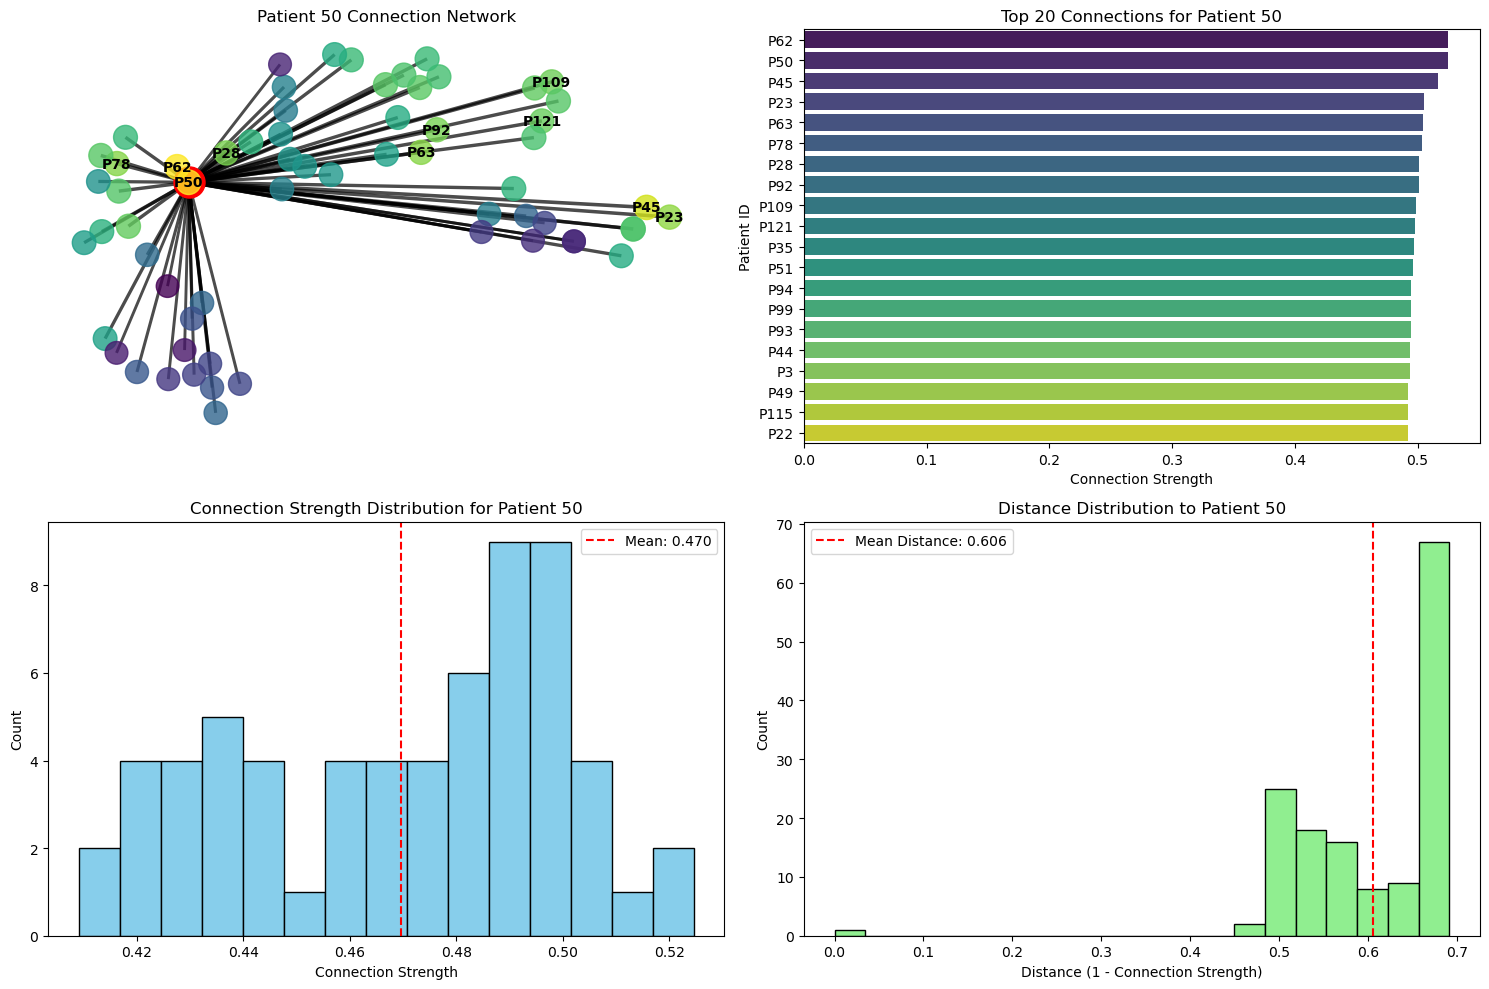

In [59]:
# Add this code after training to visualize the F2 population graph across the entire dataset

print("Generating F2 population graph for the entire dataset...")

# Create output directory for visualizations
import os
output_dir = "f2_visualizations"
os.makedirs(output_dir, exist_ok=True)

# Make sure model is in evaluation mode
model.eval()
device = next(model.parameters()).device

# Process the entire dataset to get all embeddings
import torch
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
from tqdm import tqdm

# Get node embeddings and graph embeddings for all patients
all_graph_embeddings = []
all_patient_ids = []  # Add an array to track original patient IDs if available

# Process all batches in the test loader
with torch.no_grad():
    for batch_idx, batch in enumerate(tqdm(test_loader, desc="Processing batches")):
        batch = batch.to(device)
        
        # Get node embeddings and graph embeddings
        batch.x = model.global_node_embedding(batch.original_ids.long().to(device))
        _, graph_embeddings = model.model.node_level_module(batch)
        
        # Store embeddings and patient IDs
        all_graph_embeddings.append(graph_embeddings.cpu())
        
        # If you have original patient IDs, store them as well
        if hasattr(batch, 'patient_id'):
            all_patient_ids.extend(batch.patient_id.cpu().numpy().tolist())
        elif hasattr(batch, 'id'):
            all_patient_ids.extend(batch.id.cpu().numpy().tolist())
        else:
            # If no explicit IDs, use sequential numbers
            batch_size = graph_embeddings.size(0)
            start_idx = batch_idx * batch_size
            all_patient_ids.extend(list(range(start_idx, start_idx + batch_size)))
    
    # Combine all embeddings
    all_graph_embeddings = torch.cat(all_graph_embeddings, dim=0)
    print(f"Collected embeddings for {len(all_graph_embeddings)} patients")
    
    # Process through F2 module to get the full adjacency matrix
    print("Generating adjacency matrix...")
    
    # If dataset is very large, process in chunks to avoid memory issues
    max_chunk_size = 1000  # Adjust based on your available memory
    
    if len(all_graph_embeddings) <= max_chunk_size:
        # Small enough to process at once
        adjacency_matrix, edge_index, edge_weight, kl_loss = model.model.population_level_module(all_graph_embeddings)
        adjacency_np = adjacency_matrix.cpu().numpy()
    else:
        # Process in chunks and combine
        print(f"Dataset too large, processing in chunks of {max_chunk_size}...")
        n_patients = len(all_graph_embeddings)
        adjacency_np = np.zeros((n_patients, n_patients), dtype=np.float32)
        
        for i in tqdm(range(0, n_patients, max_chunk_size), desc="Processing chunks"):
            end_idx = min(i + max_chunk_size, n_patients)
            chunk_embeddings = all_graph_embeddings[i:end_idx]
            
            # Process this chunk with all other patients
            for j in range(0, n_patients, max_chunk_size):
                end_j = min(j + max_chunk_size, n_patients)
                other_embeddings = all_graph_embeddings[j:end_j]
                
                # Calculate pairwise distances
                latent_space_i = model.model.population_level_module.latent_transform(chunk_embeddings)
                latent_space_j = model.model.population_level_module.latent_transform(other_embeddings)
                
                # Normalize
                norm_i = torch.norm(latent_space_i, p=2, dim=-1, keepdim=True)
                safe_norm_i = torch.clamp(norm_i, min=1e-8)
                latent_space_i = latent_space_i / safe_norm_i
                
                norm_j = torch.norm(latent_space_j, p=2, dim=-1, keepdim=True)
                safe_norm_j = torch.clamp(norm_j, min=1e-8)
                latent_space_j = latent_space_j / safe_norm_j
                
                # Get temperature and threshold parameters
                temperature = torch.exp(torch.clamp(model.model.population_level_module.log_temperature, min=-10, max=10))
                threshold = torch.exp(torch.clamp(model.model.population_level_module.log_threshold, min=-10, max=10))
                
                # Compute pairwise distances
                pairwise_distances = torch.cdist(latent_space_i, latent_space_j, p=2)
                
                # Compute adjacency submatrix
                scaled_distances = -temperature * pairwise_distances
                sub_adjacency = torch.sigmoid(scaled_distances + threshold)
                
                # Store in the full matrix
                adjacency_np[i:end_idx, j:end_j] = sub_adjacency.cpu().numpy()

# Print basic statistics about the adjacency matrix
print(f"Full adjacency matrix shape: {adjacency_np.shape}")
print(f"Adjacency matrix min value: {adjacency_np.min():.4f}")
print(f"Adjacency matrix max value: {adjacency_np.max():.4f}")
print(f"Adjacency matrix mean value: {adjacency_np.mean():.4f}")

# Print out a small part of the adjacency matrix (e.g., top-left 5x5 corner)
print("\nAdjacency matrix (5x5 sample):")
print(np.round(adjacency_np[:5, :5], 4))

# Try different thresholds to see how it affects connectivity
print("\nConnection density at different thresholds:")
for test_threshold in [0.1, 0.2, 0.3, 0.4, 0.5]:
    connections_above = (adjacency_np > test_threshold).sum()
    total_possible = adjacency_np.shape[0] * adjacency_np.shape[1]
    density = connections_above / total_possible
    print(f"Threshold {test_threshold}: {connections_above} connections, density {density*100:.2f}%")

# Choose an appropriate threshold based on the above analysis
connection_threshold = 0.4  # Adjust based on the density analysis

# Save the full adjacency matrix to a CSV file
adjacency_df = pd.DataFrame(adjacency_np)
csv_path = os.path.join(output_dir, "full_f2_adjacency_matrix.csv")
adjacency_df.to_csv(csv_path)
print(f"Full adjacency matrix saved to {csv_path}")

# Create a summary of connections for each patient
print("Creating connection summary...")
num_patients = adjacency_np.shape[0]
top_connections_data = []

for patient_idx in tqdm(range(num_patients), desc="Analyzing patients"):
    # Get patient ID if available
    patient_id = all_patient_ids[patient_idx] if all_patient_ids else patient_idx
    
    # Get connections for this patient
    connections = adjacency_np[patient_idx]
    
    # Calculate total connection degree
    total_degree = np.sum(connections)
    
    # Count connections above threshold
    connections_above_threshold = (connections > connection_threshold).sum()
    
    # Find top 5 connections (excluding self-connection)
    patient_indices = np.argsort(-connections)
    if patient_idx in patient_indices[:5]:  # If self-connection is in top 5, get top 6 and remove self
        top_indices = [idx for idx in patient_indices[:6] if idx != patient_idx][:5]
    else:
        top_indices = patient_indices[:5]
    
    # Get original IDs for top connections if available
    if all_patient_ids:
        top_patient_ids = [all_patient_ids[idx] for idx in top_indices]
    else:
        top_patient_ids = top_indices
    
    # Format connection info
    connection_info = ", ".join([f"P{p_id}:{connections[idx]:.3f}" for idx, p_id in zip(top_indices, top_patient_ids)])
    
    # Add row to data
    top_connections_data.append({
        "Patient Index": patient_idx,
        "Patient ID": patient_id,
        "Connection Degree": total_degree,
        "Connections Above Threshold": connections_above_threshold,
        "Top 5 Connections": connection_info
    })

# Create and save DataFrame
top_connections_df = pd.DataFrame(top_connections_data)
summary_path = os.path.join(output_dir, "full_f2_adjacency_summary.csv")
top_connections_df.to_csv(summary_path, index=False)
print(f"Adjacency matrix summary saved to {summary_path}")

# Find the most connected patients
top_connected_indices = top_connections_df['Connection Degree'].nlargest(5).index.tolist()
print("\nTop 5 Most Connected Patients:")
for i, idx in enumerate(top_connected_indices):
    patient_data = top_connections_df.iloc[idx]
    print(f"#{i+1}: Patient {patient_data['Patient ID']} - Connection Degree: {patient_data['Connection Degree']:.4f}, "
          f"Connected to {patient_data['Connections Above Threshold']} patients above threshold {connection_threshold}")

# Function to visualize a specific patient's connections
def visualize_patient_connections(patient_idx, threshold=0.4, save=True):
    # Get patient ID if available
    patient_id = all_patient_ids[patient_idx] if all_patient_ids else patient_idx
    
    # Get connection strengths for the selected patient
    connections = adjacency_np[patient_idx]
    
    # Find patients connected to the selected patient (those with connection strength > threshold)
    connected_indices = np.where(connections > threshold)[0]
    
    # Sort connected patients by connection strength in descending order
    connected_indices = connected_indices[np.argsort(-connections[connected_indices])]
    
    # Get connection strengths for these patients
    connection_strengths = connections[connected_indices]
    
    # Print patient connection information
    print(f"\nPatient {patient_id} (index {patient_idx}) Connection Analysis:")
    print(f"Total connection degree: {np.sum(connections):.4f}")
    print(f"Connected to {len(connected_indices)} other patients with strength > {threshold}")
    
    # Create the visualization
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Network visualization for the patient and connections
    plt.subplot(2, 2, 1)
    
    # Create a subgraph with just this patient and connections
    G = nx.Graph()
    G.add_node(patient_idx)
    
    # Add connected patients and their edges
    for idx in connected_indices:
        G.add_node(idx)
        G.add_edge(patient_idx, idx, weight=connections[idx])
    
    # Apply t-SNE for 2D visualization of the patient and connections' embeddings
    patient_and_connections = np.concatenate([[patient_idx], connected_indices])
    
    # Get the relevant embeddings
    embeddings_to_plot = all_graph_embeddings[patient_and_connections].cpu().numpy()
    
    # Use t-SNE if there are enough points, otherwise just place in a circle
    if len(patient_and_connections) >= 5:
        tsne = TSNE(n_components=2, random_state=42, perplexity=min(5, len(patient_and_connections)-1))
        pos_array = tsne.fit_transform(embeddings_to_plot)
        pos = {patient_and_connections[i]: (pos_array[i, 0], pos_array[i, 1]) for i in range(len(patient_and_connections))}
    else:
        # Place in a circular layout
        pos = nx.circular_layout(G)
    
    # Draw the network in separate steps
    
    # Draw the main patient
    nx.draw_networkx_nodes(G, pos=pos, 
                          nodelist=[patient_idx],
                          node_size=500,
                          node_color='red',
                          alpha=1.0)
    
    # Draw the connected patients
    if len(connected_indices) > 0:
        # Create sizes array that matches the connected_indices length
        connected_sizes = [100 + 400 * connections[idx] for idx in connected_indices]
        
        nx.draw_networkx_nodes(G, pos=pos, 
                              nodelist=connected_indices.tolist(),
                              node_size=connected_sizes,
                              node_color=[connections[idx] for idx in connected_indices],
                              cmap=plt.cm.viridis,
                              alpha=0.8)
    
    # Draw edges with thickness based on connection strength
    for i, idx in enumerate(connected_indices):
        nx.draw_networkx_edges(G, pos, 
                              edgelist=[(patient_idx, idx)], 
                              width=connections[idx] * 5,
                              alpha=0.7)
    
    # Add labels - use original patient IDs if available
    if all_patient_ids:
        main_label = f"P{all_patient_ids[patient_idx]}"
        labels = {patient_idx: main_label}
        for idx in connected_indices[:10]:  # Label only the top 10 connections to avoid clutter
            labels[idx] = f"P{all_patient_ids[idx]}"
    else:
        labels = {patient_idx: f"P{patient_idx}"}
        for idx in connected_indices[:10]:
            labels[idx] = f"P{idx}"
    
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_weight='bold')
    
    plt.title(f"Patient {patient_id} Connection Network")
    plt.axis('off')
    
    # Plot 2: Bar chart of top connections
    plt.subplot(2, 2, 2)
    if len(connected_indices) > 0:
        # Get top 20 connections (or all if fewer)
        top_n = min(20, len(connected_indices))
        top_connections = connected_indices[:top_n]
        top_strengths = connection_strengths[:top_n]
        
        # Create a DataFrame for easier plotting
        if all_patient_ids:
            top_patient_labels = [f"P{all_patient_ids[idx]}" for idx in top_connections]
        else:
            top_patient_labels = [f"P{idx}" for idx in top_connections]
            
        df = pd.DataFrame({
            'Patient': top_patient_labels,
            'Connection Strength': top_strengths
        })
        
        # Plot horizontal bar chart
        ax = sns.barplot(x='Connection Strength', y='Patient', data=df, palette='viridis')
        ax.set_title(f"Top {top_n} Connections for Patient {patient_id}")
        ax.set_xlabel('Connection Strength')
        ax.set_ylabel('Patient ID')
    else:
        plt.text(0.5, 0.5, "No connections found above threshold", 
                horizontalalignment='center', verticalalignment='center')
    
    # Plot 3: Connection strength distribution
    plt.subplot(2, 2, 3)
    if len(connected_indices) > 0:
        plt.hist(connection_strengths, bins=15, color='skyblue', edgecolor='black')
        plt.axvline(x=np.mean(connection_strengths), color='red', linestyle='--', 
                   label=f'Mean: {np.mean(connection_strengths):.3f}')
        plt.title(f'Connection Strength Distribution for Patient {patient_id}')
        plt.xlabel('Connection Strength')
        plt.ylabel('Count')
        plt.legend()
    else:
        plt.text(0.5, 0.5, "No connections found above threshold", 
                horizontalalignment='center', verticalalignment='center')
    
    # Plot 4: Patient in the global context (distances to other patients)
    plt.subplot(2, 2, 4)
    
    # Calculate distances to all other patients
    all_distances = np.zeros(num_patients)
    for i in range(num_patients):
        if i != patient_idx:
            all_distances[i] = 1 - adjacency_np[patient_idx, i]  # Convert similarity to distance
        else:
            all_distances[i] = 0  # Distance to self is 0
    
    # Create histogram of distances
    plt.hist(all_distances, bins=20, color='lightgreen', edgecolor='black')
    plt.axvline(x=np.mean(all_distances), color='red', linestyle='--', 
               label=f'Mean Distance: {np.mean(all_distances):.3f}')
    plt.title(f'Distance Distribution to Patient {patient_id}')
    plt.xlabel('Distance (1 - Connection Strength)')
    plt.ylabel('Count')
    plt.legend()
    
    plt.tight_layout()
    
    # Save the visualization
    if save:
        save_path = os.path.join(output_dir, f"patient_{patient_id}_connections.png")
        plt.savefig(save_path)
        print(f"Patient connection visualization saved to {save_path}")
        
        # Save connection data to CSV
        if len(connected_indices) > 0:
            connection_data = []
            for i, idx in enumerate(connected_indices):
                if all_patient_ids:
                    connected_id = all_patient_ids[idx]
                else:
                    connected_id = idx
                    
                connection_data.append({
                    "Connected Patient Index": int(idx),
                    "Connected Patient ID": int(connected_id),
                    "Connection Strength": float(connections[idx]),
                    "Rank": i+1
                })
            
            # Convert to DataFrame and save
            df_connections = pd.DataFrame(connection_data)
            csv_path = os.path.join(output_dir, f"patient_{patient_id}_connections.csv")
            df_connections.to_csv(csv_path, index=False)
            print(f"Patient connection data saved to {csv_path}")
    else:
        plt.show()

# Visualize the top connected patient
top_patient_idx = top_connections_df['Connection Degree'].idxmax()
top_patient_id = top_connections_df.iloc[top_patient_idx]['Patient ID']
print(f"\nVisualizing top connected patient (ID: {top_patient_id}, Index: {top_patient_idx})...")
visualize_patient_connections(top_patient_idx, threshold=connection_threshold)

# Allow the user to select a specific patient to visualize
print("\nTo visualize a specific patient, you can call the function:")
print("visualize_patient_connections(patient_idx, threshold=0.4)")
print("Where patient_idx is the index of the patient you want to visualize")